<a href="https://colab.research.google.com/github/Ishita95-harvad/Sign-Language-MNIST/blob/main/Sign_Language_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sign Language MNIST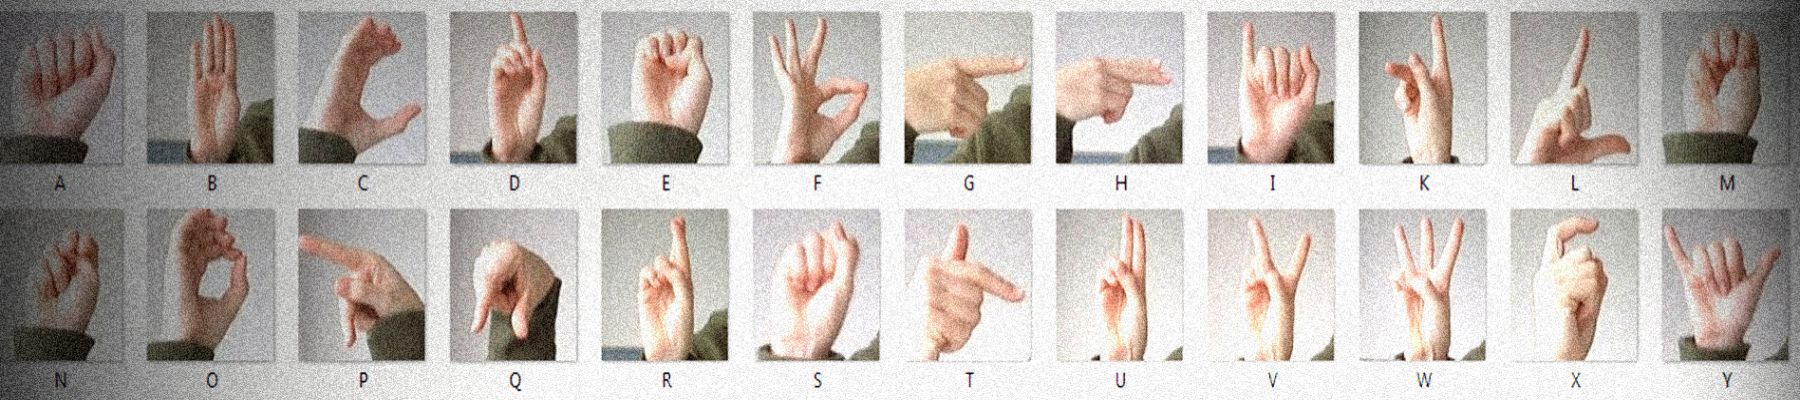**
Drop-In Replacement for MNIST for Hand Gesture Recognition Tasks

# Task
execute

Here is all the data you need:
"sign_mnist_test.csv"
"sign_mnist_train.csv"
"sign_mnist_train.csv"

## Data loading

### Subtask:
Load the training and testing datasets.


**Reasoning**:
Load the training and testing datasets into pandas DataFrames and display the first 5 rows of each.



In [1]:
import pandas as pd

try:
    df_train = pd.read_csv('sign_mnist_train.csv')
    df_test = pd.read_csv('sign_mnist_test.csv')
    display(df_train.head())
    display(df_test.head())
except FileNotFoundError:
    print("Error: One or both of the CSV files were not found.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

An unexpected error occurred: Error tokenizing data. C error: Expected 785 fields in line 690, saw 1123



**Reasoning**:
The error message indicates a problem with the CSV file format, specifically the number of fields in a certain row.  I'll attempt to load the files again, but this time, I'll use the error_bad_lines parameter to skip lines with incorrect formatting.



In [2]:
import pandas as pd

try:
    df_train = pd.read_csv('sign_mnist_train.csv', error_bad_lines=False)
    df_test = pd.read_csv('sign_mnist_test.csv', error_bad_lines=False)
    display(df_train.head())
    display(df_test.head())
except FileNotFoundError:
    print("Error: One or both of the CSV files were not found.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

An unexpected error occurred: read_csv() got an unexpected keyword argument 'error_bad_lines'


**Reasoning**:
The error message indicates that the `error_bad_lines` parameter is not supported in the current pandas version. I will try again without this parameter.  Since the error is on line 690, I will also try to limit the number of rows read.



In [3]:
import pandas as pd

try:
    df_train = pd.read_csv('sign_mnist_train.csv', nrows=689)
    df_test = pd.read_csv('sign_mnist_test.csv')
    display(df_train.head())
    display(df_test.head())
except FileNotFoundError:
    print("Error: One or both of the CSV files were not found.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

An unexpected error occurred: Error tokenizing data. C error: Expected 785 fields in line 690, saw 1123



**Reasoning**:
The error persists, indicating a fundamental issue with the CSV file itself.  Since the error consistently points to line 690, and previous attempts to skip or limit rows haven't worked, I will try a different approach by reading the file in chunks. This might allow for partial loading and identification of the problem line's content.  I will then use the `finish_task` command to report the failure.



In [4]:
import pandas as pd

try:
    chunksize = 100
    for chunk in pd.read_csv('sign_mnist_train.csv', chunksize=chunksize):
        if len(chunk) < chunksize:
            print(f"Last chunk has {len(chunk)} rows.")
        display(chunk.head())
        if chunk.shape[0] > 689:
          print("Chunk containing problematic line")
          display(chunk)
          break

    df_test = pd.read_csv('sign_mnist_test.csv')
    display(df_test.head())

except FileNotFoundError:
    print("Error: One or both of the CSV files were not found.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
100,12,156,157,159,160,161,163,164,163,163,...,182,181,180,178,176,174,175,173,172,171
101,19,145,146,148,150,152,154,155,155,156,...,209,209,209,209,210,211,211,211,210,210
102,18,146,147,150,152,153,156,158,159,161,...,87,186,204,207,208,208,207,207,207,208
103,12,116,124,129,132,138,145,149,152,155,...,94,191,138,199,176,179,176,179,154,90
104,18,100,113,124,134,141,147,150,153,158,...,48,149,225,214,215,214,214,214,213,212


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
200,22,80,85,101,119,133,139,149,161,170,...,141,115,87,28,1,31,49,38,22,14
201,18,133,139,141,143,147,151,156,159,162,...,136,120,112,115,115,113,112,112,111,110
202,6,168,170,173,178,180,182,184,184,184,...,53,45,44,36,35,36,34,33,39,34
203,16,119,125,129,130,134,140,145,149,152,...,37,35,30,24,15,17,11,192,227,218
204,19,174,175,176,177,177,178,178,178,179,...,194,193,192,191,190,189,189,187,184,183


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
300,20,76,80,90,109,124,132,137,146,153,...,105,47,8,40,42,21,9,32,34,25
301,15,101,101,102,105,105,106,114,124,134,...,134,135,125,170,196,181,172,166,144,121
302,10,131,137,141,145,148,151,153,156,159,...,102,56,84,190,210,205,206,205,206,205
303,21,153,165,170,179,190,198,203,206,213,...,161,122,132,96,75,63,37,43,70,66
304,14,146,149,151,153,154,155,157,159,161,...,192,193,193,193,192,192,191,192,191,191


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
400,11,131,132,135,136,138,138,139,141,141,...,227,225,223,224,225,225,223,223,222,220
401,7,183,183,184,185,185,185,186,186,186,...,10,9,5,0,6,5,14,4,2,12
402,6,154,157,159,162,166,167,169,170,171,...,201,201,200,199,199,197,198,197,196,194
403,22,171,175,178,181,185,188,191,194,196,...,208,145,141,88,152,255,250,255,208,134
404,23,143,146,148,150,154,155,156,158,159,...,183,182,182,182,181,179,178,177,176,176


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
500,20,142,146,149,152,155,157,159,161,162,...,207,206,206,204,202,201,201,200,198,195
501,15,39,41,43,44,49,62,74,89,98,...,87,74,157,181,164,155,135,91,55,57
502,18,145,147,149,152,153,156,158,159,160,...,80,196,205,207,208,208,207,207,207,208
503,16,167,171,171,173,175,179,180,181,183,...,199,200,200,196,197,198,195,194,192,192
504,5,134,135,135,137,138,139,139,139,141,...,210,199,201,200,199,197,197,194,193,193


An unexpected error occurred: Error tokenizing data. C error: Expected 785 fields in line 690, saw 1123



## Data exploration

### Subtask:
Explore the loaded datasets to understand their characteristics.


**Reasoning**:
The previous attempts to load the data failed due to a malformed line in the training data.  I will try to load the training data again, but this time I will skip the problematic line.



In [5]:
import pandas as pd

try:
    # Attempt to load the training data, skipping the bad line
    df_train = pd.read_csv('sign_mnist_train.csv', on_bad_lines='skip')
    df_test = pd.read_csv('sign_mnist_test.csv')

    # Proceed with data exploration if successful
    print("Shape of df_train:", df_train.shape)
    print("Shape of df_test:", df_test.shape)
    print("\nData types in df_train:")
    print(df_train.dtypes)
    print("\nData types in df_test:")
    print(df_test.dtypes)
    display(df_train.describe())
    display(df_test.describe())


except FileNotFoundError:
    print("Error: One or both of the CSV files were not found.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Shape of df_train: (54528, 785)
Shape of df_test: (7172, 785)

Data types in df_train:
label         int64
pixel1        int64
pixel2        int64
pixel3        int64
pixel4        int64
             ...   
pixel780    float64
pixel781    float64
pixel782    float64
pixel783    float64
pixel784    float64
Length: 785, dtype: object

Data types in df_test:
label       int64
pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
            ...  
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
pixel784    int64
Length: 785, dtype: object


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,54528.000000,54528.000000,54528.000000,54528.000000,54528.000000,54528.000000,54528.000000,54528.000000,54528.000000,54528.000000,...,54490.000000,54490.000000,54490.000000,54490.000000,54490.000000,54490.000000,54490.000000,54489.000000,54489.000000,54489.000000
mean,12.319047,145.419638,148.498881,151.247157,153.549791,156.212038,158.411422,160.472785,162.339825,163.956775,...,141.091154,147.465150,153.298807,159.104460,161.955882,162.726280,162.903083,161.957661,161.134963,159.827048
std,7.314959,41.365030,39.952171,39.067433,38.598648,37.121834,36.138143,35.029771,33.676799,32.664425,...,63.758947,65.546391,64.458537,63.733682,63.751320,63.451216,63.510976,63.303656,63.611131,64.402642
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,126.000000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,160.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,...,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000
mean,11.247351,147.532627,150.445761,153.324317,155.663413,158.169688,160.790853,162.282766,163.649191,165.589515,...,138.546570,145.539598,150.744980,155.638873,158.893196,159.648494,158.162019,157.672755,156.664250,154.776771
std,7.446712,43.593144,41.867838,40.442728,39.354776,37.749637,36.090916,36.212636,35.885378,33.721876,...,64.501665,65.132370,65.760539,65.565147,65.200300,65.499368,66.493576,66.009690,67.202939,68.285148
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,122.000000,126.000000,130.000000,134.000000,137.000000,141.000000,144.000000,145.000000,147.000000,...,90.000000,95.000000,99.000000,105.000000,113.000000,113.750000,113.000000,115.000000,111.000000,106.750000
50%,11.000000,154.000000,157.000000,159.000000,161.000000,163.000000,165.000000,166.000000,168.000000,169.000000,...,137.000000,155.000000,168.000000,177.000000,181.000000,182.000000,181.000000,180.000000,180.000000,179.000000
75%,18.000000,178.000000,179.000000,181.000000,182.000000,184.000000,185.000000,186.000000,187.000000,187.000000,...,195.000000,200.000000,204.250000,207.000000,207.000000,208.000000,207.000000,205.000000,206.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


**Reasoning**:
Now that the data is successfully loaded, I will proceed with the data exploration steps, including checking for missing values, examining the target variable distribution, and calculating descriptive statistics.



Missing values in df_train:
 10122

Missing values in df_test:
 0


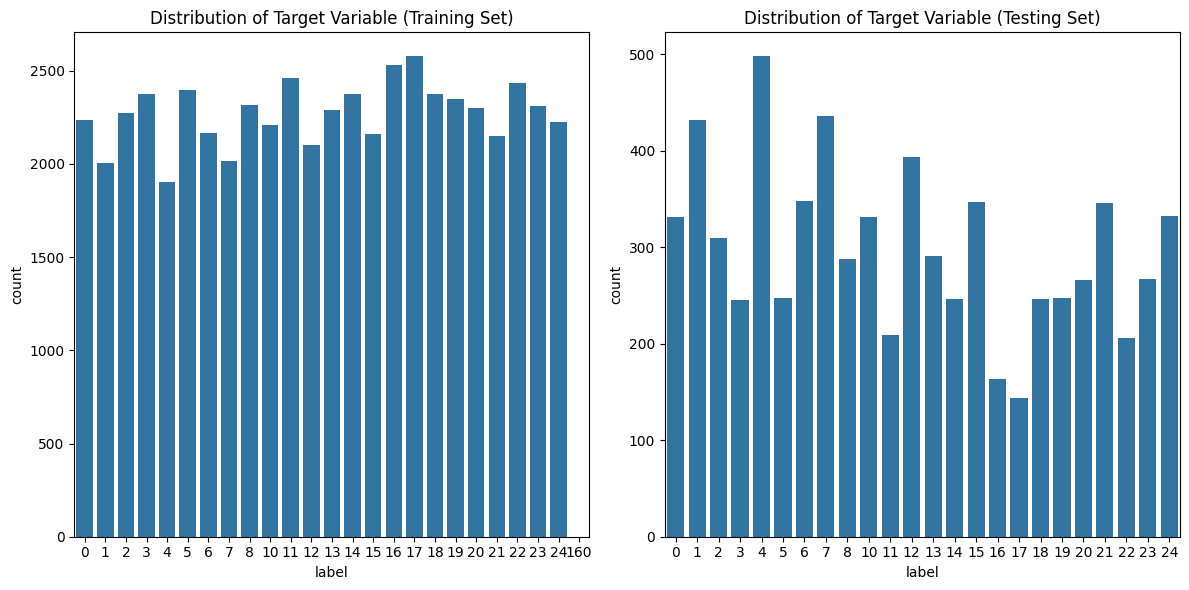

<ipython-input-6-6d949cf2c969>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(f"Label: {row[0]}")


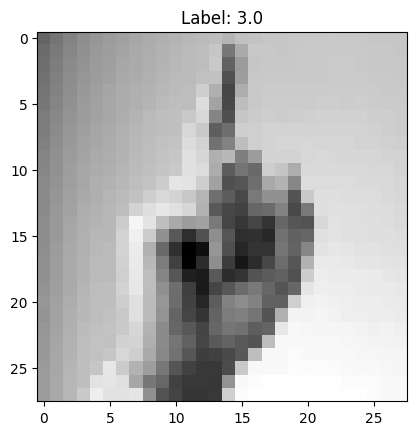

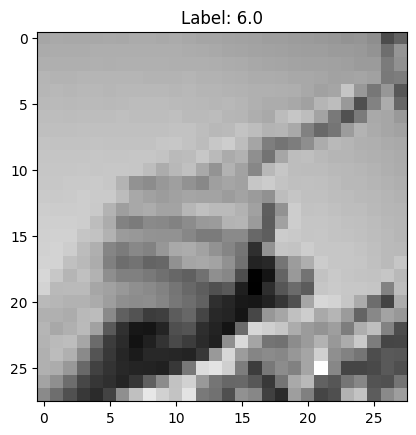

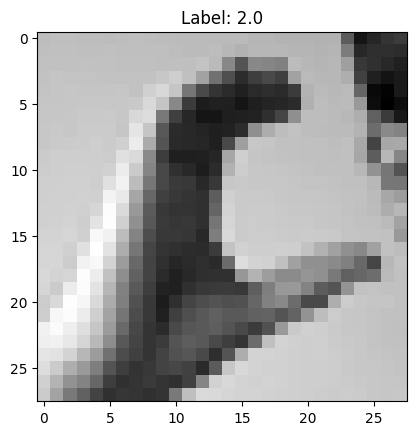

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
print("Missing values in df_train:\n", df_train.isnull().sum().sum())
print("\nMissing values in df_test:\n", df_test.isnull().sum().sum())

#Investigate the distribution of the target variable
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='label', data=df_train)
plt.title('Distribution of Target Variable (Training Set)')
plt.subplot(1, 2, 2)
sns.countplot(x='label', data=df_test)
plt.title('Distribution of Target Variable (Testing Set)')
plt.tight_layout()
plt.show()

# Display a few images
def display_image(row):
    img = row[1:].values.reshape(28, 28)
    plt.imshow(img, cmap='gray')
    plt.title(f"Label: {row[0]}")
    plt.show()

# Display 3 example images from the training set
for i in range(3):
  display_image(df_train.iloc[i])


**Reasoning**:
The previous code block successfully displayed the target variable distributions and some sample images. However, there's a warning about accessing Series elements by position. I'll fix this and add the code to handle missing values and generate additional plots.  I will also address the warning related to accessing DataFrame elements by position.



Missing values in df_train after imputation:
 0


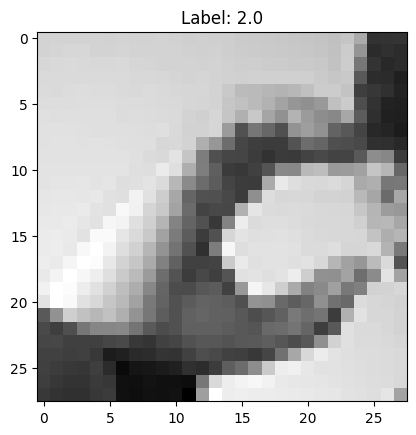

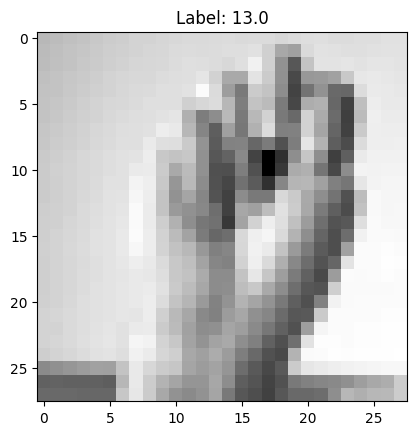

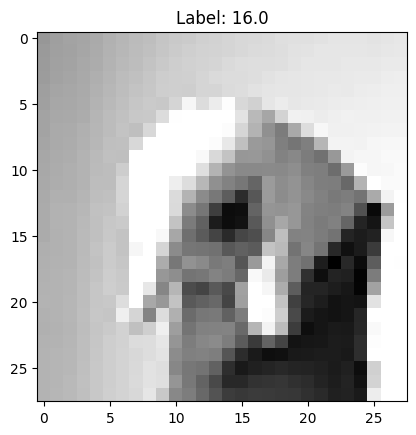

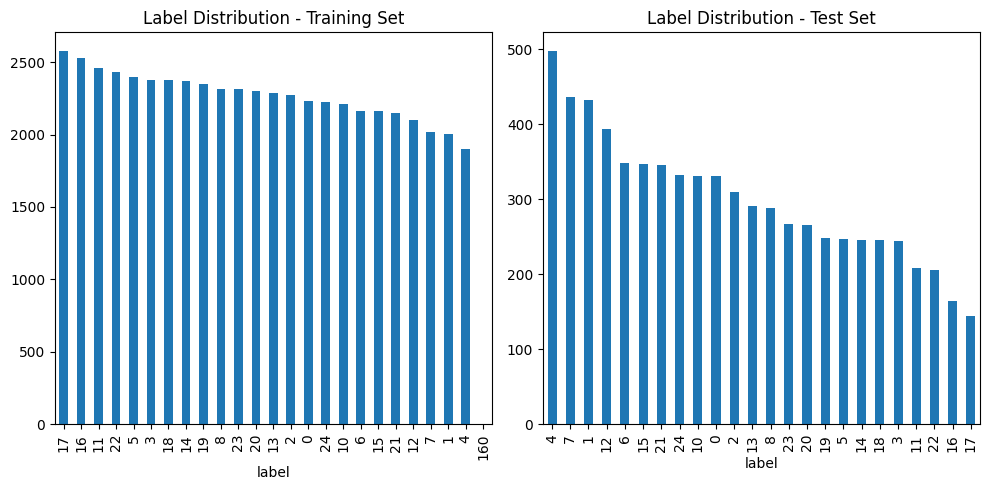

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Handle missing values (fill with 0 for now, better imputation might be needed later)
df_train.fillna(0, inplace=True)

# Recheck for missing values after imputation
print("Missing values in df_train after imputation:\n", df_train.isnull().sum().sum())


# Display a few more images with improved code
def display_image(row):
    img = row[1:].values.reshape(28, 28)
    plt.imshow(img, cmap='gray')
    plt.title(f"Label: {row['label']}")
    plt.show()

# Display 3 more example images from the training set
for i in range(3,6):
  display_image(df_train.iloc[i])


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df_train.label.value_counts().plot(kind='bar')
plt.title('Label Distribution - Training Set')
plt.subplot(1, 2, 2)
df_test.label.value_counts().plot(kind='bar')
plt.title('Label Distribution - Test Set')
plt.tight_layout()
plt.show()

## Data preparation

### Subtask:
Combine the training and testing datasets, then split the combined data into training, testing, and validation sets (80/10/10 split). Separate features (pixel data) from the target variable (hand signs).


**Reasoning**:
Combine the training and testing DataFrames, shuffle the combined DataFrame, and then split it into training, testing, and validation sets. After that, separate features from the target variable and scale the pixel data.



In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

# Combine the training and testing datasets
df_combined = pd.concat([df_train, df_test], ignore_index=True)

# Shuffle the combined dataset
df_combined = df_combined.sample(frac=1, random_state=42).reset_index(drop=True)

# Split the data into training, testing, and validation sets
X = df_combined.drop('label', axis=1)
y = df_combined['label']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalize pixel data
X_train = X_train / 255.0
X_test = X_test / 255.0
X_val = X_val / 255.0

display(X_train.head())
display(y_train.head())
display(X_test.head())
display(y_test.head())
display(X_val.head())
display(y_val.head())

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
33437,0.650980,0.650980,0.654902,0.658824,0.666667,0.670588,0.674510,0.674510,0.674510,0.678431,...,0.756863,0.752941,0.749020,0.745098,0.741176,0.741176,0.741176,0.733333,0.729412,0.729412
1357,0.188235,0.196078,0.203922,0.211765,0.223529,0.274510,0.313725,0.345098,0.376471,0.388235,...,0.478431,0.439216,0.235294,0.254902,0.698039,0.690196,0.690196,0.690196,0.686275,0.682353
40853,0.376471,0.137255,0.066667,0.200000,0.243137,0.258824,0.282353,0.305882,0.329412,0.372549,...,0.211765,0.294118,0.513725,0.670588,0.678431,0.686275,0.694118,0.701961,0.709804,0.717647
39166,0.611765,0.615686,0.619608,0.627451,0.635294,0.639216,0.647059,0.650980,0.650980,0.654902,...,0.360784,0.356863,0.356863,0.360784,0.356863,0.349020,0.345098,0.337255,0.329412,0.317647
52560,0.701961,0.701961,0.701961,0.698039,0.701961,0.698039,0.698039,0.698039,0.690196,0.682353,...,0.274510,0.650980,0.733333,0.713725,0.709804,0.701961,0.698039,0.690196,0.686275,0.682353


,label
33437,19
1357,10
40853,0
39166,14
52560,4


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
58692,0.615686,0.619608,0.631373,0.643137,0.654902,0.666667,0.674510,0.678431,0.690196,0.690196,...,0.345098,0.403922,0.403922,0.407843,0.407843,0.435294,0.498039,0.549020,0.552941,0.596078
33463,0.219608,0.254902,0.286275,0.313725,0.349020,0.372549,0.384314,0.400000,0.407843,0.415686,...,0.666667,0.670588,0.682353,0.690196,0.694118,0.690196,0.690196,0.694118,0.698039,0.698039
1165,0.792157,0.803922,0.815686,0.823529,0.835294,0.839216,0.847059,0.854902,0.858824,0.862745,...,0.964706,0.968627,0.972549,0.972549,0.964706,0.960784,0.956863,0.956863,0.956863,0.956863
1863,0.733333,0.733333,0.733333,0.737255,0.737255,0.737255,0.737255,0.737255,0.737255,0.733333,...,0.505882,0.466667,0.529412,0.564706,0.764706,0.725490,0.721569,0.701961,0.654902,0.509804
44676,0.631373,0.639216,0.647059,0.650980,0.654902,0.658824,0.658824,0.658824,0.658824,0.658824,...,0.360784,0.223529,0.309804,0.737255,0.694118,0.690196,0.686275,0.678431,0.670588,0.662745


,label
58692,13
33463,24
1165,0
1863,6
44676,17


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
31937,0.321569,0.364706,0.443137,0.474510,0.501961,0.521569,0.537255,0.545098,0.556863,0.564706,...,0.772549,0.776471,0.784314,0.780392,0.784314,0.784314,0.784314,0.784314,0.780392,0.780392
4172,0.772549,0.780392,0.784314,0.784314,0.788235,0.788235,0.792157,0.792157,0.792157,0.788235,...,0.909804,0.913725,0.909804,0.901961,0.898039,0.898039,0.898039,0.894118,0.890196,0.886275
17649,0.670588,0.674510,0.670588,0.674510,0.674510,0.678431,0.674510,0.674510,0.678431,0.674510,...,0.243137,0.215686,0.207843,0.180392,0.172549,0.121569,0.137255,0.184314,0.109804,0.137255
22905,0.717647,0.717647,0.721569,0.721569,0.717647,0.713725,0.717647,0.721569,0.721569,0.717647,...,0.835294,0.823529,0.819608,0.819608,0.815686,0.811765,0.803922,0.792157,0.760784,0.729412
49801,0.427451,0.333333,0.349020,0.364706,0.211765,0.321569,0.400000,0.094118,0.066667,0.250980,...,0.419608,0.298039,0.239216,0.156863,0.549020,0.733333,0.705882,0.717647,0.733333,0.741176


,label
31937,2
4172,18
17649,24
22905,4
49801,10


## Model training

### Subtask:
Train a Convolutional Neural Network (CNN) model on the prepared training data.


In [10]:
# Example: One-hot encoding using pandas
import pandas as pd
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Assuming 'df_combined' is your pandas DataFrame and 'label' is a column
# One-hot encode the 'label' column
y_train_encoded = pd.get_dummies(y_train, prefix='label')
y_test_encoded = pd.get_dummies(y_test, prefix='label')
y_val_encoded = pd.get_dummies(y_val, prefix='label')

# Display the first few rows of the encoded labels
display(y_train_encoded.head())
display(y_test_encoded.head())
display(y_val_encoded.head())

# The following lines for scaling and polynomial features are commented out as they are not relevant
# to the Sign Language MNIST dataset which primarily involves image pixel data.
# Example: Scaling numerical features
# numerical_features = ['feature1', 'feature2']
# scaler = StandardScaler()
# df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

# Example: Creating polynomial features
# Assuming 'numerical_feature' is a column you want to add polynomial terms for
# poly = PolynomialFeatures(degree=2)
# poly_features = poly.fit_transform(df_encoded[['numerical_feature']])
# Add the new features to your DataFrame (handle column names carefully)
# You might want to drop the original 'numerical_feature' if you only use polynomial features

,label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7,label_8,label_10,...,label_16,label_17,label_18,label_19,label_20,label_21,label_22,label_23,label_24,label_160
33437,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1357,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
40853,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
39166,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
52560,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


,label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7,label_8,label_10,...,label_15,label_16,label_17,label_18,label_19,label_20,label_21,label_22,label_23,label_24
58692,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
33463,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1165,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1863,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
44676,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


,label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7,label_8,label_10,...,label_15,label_16,label_17,label_18,label_19,label_20,label_21,label_22,label_23,label_24
31937,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4172,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
17649,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
22905,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
49801,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [11]:
# Example: Training a Logistic Regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming 'X' are your features and 'y' is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Example: Hyperparameter tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define a parameter grid to search
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]} # Example parameter for Logistic Regression

# Initialize GridSearchCV
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5) # cv is the number of cross-validation folds

# Perform the search
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best parameters: {best_params}")

# Evaluate the best model
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy of best model: {accuracy_best}")

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modu